## Analyzing tweets with VADER Sentiment

Majority of the tweets from these news organizations appear to be neutral. Also, tweets and tweet polarity don’t seem to be related. The VADER sentiment score from one tweet to the next can vary. 

Overall, CBS appears to be the most positive organization with an average VADER sentiment score of 0.25, while The New York Times appears to be the most negative with an average VADER sentiment score of -0.04. 

CNN appears to be the most neutral organization with an average VADER sentiment of 0.013

Emojis are seen more frequently in tweets of BBC and CBS, which added weights to their neutral scores. 


In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import json
import time
import datetime
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target Media Channels
target_user = ('@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes')

# List for dictionaries of results
# Variables for holding sentiments
results_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_number = []
tweet_date = []
tweet_text = []

# Loop through each user
for target in target_user:

        public_tweets = api.user_timeline(target, count=100, result_type = 'recent')
        
        tweet_ago = 0

        # Loop through all tweets
        for tweet in public_tweets:
            
            # Print Tweets
            print(f'Tweet {tweet_ago}: {tweet["text"]}')

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet['text'])
            compound = results['compound']
            pos = results['pos']
            neu = results['neu']
            neg = results['neg']
            
            tweet_ago += 1
                      
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            neutral_list.append(neu)
            negative_list.append(neg)
            results_list.append(target)
            tweet_number.append(tweet_ago)
            tweet_date.append(tweet['created_at'])
            tweet_text.append(tweet['text'])
                
            sentiments = {'User': results_list,
                          'Date': tweet_date,
                          'Tweet Text' : tweet_text,
                          'Compound': compound_list,
                          'Positive': positive_list,
                          'Neutral': neutral_list,
                          'Negative': negative_list,
                         'Tweets Ago': tweet_number}
            
print(sentiments) 

Tweet 0: Colin Firth stars in an award-winning adaptation of Jane Austen's classic romance. 📚😍

Pride and Prejudice |… https://t.co/bgxyIt8i5g
Tweet 1: From @rosskemp to @sirpatstew: these are the ultimate Extras celebrity cameos. 😂

https://t.co/MzLh704sPC
Tweet 2: Is this Africa’s most inventive neighbourhood? 💡🌿🥑

https://t.co/xgeQCMM1XP
Tweet 3: Researchers have found evidence of an existing body of liquid water on Mars.
👉 https://t.co/cmykUjdfxy https://t.co/F45qHNXcOR
Tweet 4: RT @BBCWthrWatchers: On Friday night you may see the moon turn red during a total lunar eclipse. Lasting 1 hr 40 mins it will be the longes…
Tweet 5: 💉 A jab that protects against a virus that causes cervical cancer will be given to boys aged 12 to 13 in England.
👉… https://t.co/joOj8vMupR
Tweet 6: RT @bbcpress: 🤣 Want to write comedy? Want a six-month bursary to train and develop your skills at the BBC?
⏰ TIME IS RUNNING OUT! The dead…
Tweet 7: 🌊🐬 These dolphins were rescued after getting stranded in shall

Tweet 0: This is one allowance that can’t be beat! Kids are winning big this week on @PriceIsRight. 🎉
 https://t.co/lncKu9XvNo
Tweet 1: Renowned artists Cher, Philip Glass, Reba McEntire, Wayne Shorter, and the co-creators of #Hamilton will be recogni… https://t.co/PEjjI9MKE1
Tweet 2: Who's excited for the return of @MurphyBrownCBS? Here's a behind-the-scenes look at the first table read of the sea… https://t.co/1B5S4WJnCW
Tweet 3: Mark your calendars because you won’t want to miss this! Former Secretaries of State @HillaryClinton, @Madeleine, a… https://t.co/JKDPp97OqN
Tweet 4: The cast couldn’t be more excited to welcome @ansonmount into the @startrekcbs family! Who’s ready to see the iconi… https://t.co/fOS4f4VCb2
Tweet 5: RT @startrekcbs: Stream the full panel &amp; learn all the exclusive details revealed about season 2 of #StarTrekDiscovery at @Comic_Con: https…
Tweet 6: RT @MagnumPICBS: Couldn't make it to San Diego for the #MagnumPI panel? Here's everything you missed at #SDCC2

Tweet 0: New Jersey's top law enforcement official has instructed prosecutors statewide to hold off on pursuing convictions… https://t.co/yUO0dShfd4
Tweet 1: RT @CNNTonight: "Putin clearly has the upper hand here and is, I think the alpha dog in this relationship. I just wonder whether the Russia…
Tweet 2: RT @CuomoPrimeTime: “Untrue and un-American” @ChrisCuomo reflects on the President calling journalists the “enemy of the people” and tellin…
Tweet 3: The military does not belong to Donald Trump | By Barbara Starr via @CNNOpinion https://t.co/5baUbANnV5 https://t.co/t0vU8Ob5kH
Tweet 4: Two boys, 10, and 7, decided they wanted to drive more than 100 miles to the beach. While en route, they crashed th… https://t.co/mzZaDUmO4j
Tweet 5: A federal judge has allowed a case against President Donald Trump, alleging illegal foreign gifts, to proceed… https://t.co/EVbMlCMS58
Tweet 6: A Pennsylvania board found that Bill Cosby is a sexually violent predator; the final decision on his classifica

Tweet 0: .@LindseyGrahamSC: "The tariffs are hurting, but [we've] got to experience some pain to bring about change."… https://t.co/R7NpPgTJmq
Tweet 1: .@SecPompeo testifies on Russia, North Korea https://t.co/xdq3fF4JQn https://t.co/Xe9uWTAtYR
Tweet 2: .@RepMarkMeadows: "Why do we have to dig so deep to find out information that should come free-flowing if we're rea… https://t.co/mlFWp5Tb7c
Tweet 3: Rep. @Jim_Jordan: "We have sent numerous letters to Rod Rosenstein they haven't complied with. Two subpoenas they h… https://t.co/NH8e4F9jf7
Tweet 4: .@RepMarkMeadows on what he's accusing Deputy AG Rod Rosenstein of in articles of impeachment: "Not only have subpo… https://t.co/fsBOKfbevJ
Tweet 5: .@IngrahamAngle: "With tough tariffs and blunt talk, [@POTUS] has now brought China to the negotiating table." https://t.co/3xOQvTN7sj
Tweet 6: .@IngrahamAngle: "America's winning again because we have a president with guts." https://t.co/KJMCgvV9R4
Tweet 7: DiGenova on Possible Rosenstein Impea

Tweet 0: RT @S_Evangelina: You don't know what Fortnite is? I got you. https://t.co/YutNdy5TnX
Tweet 1: A group of House Republicans introduced articles of impeachment in a long-shot bid to oust deputy attorney general… https://t.co/4kgvusJ0oA
Tweet 2: New Zealand accused Australia this week of copying its national flag. Take the quiz and see if you can identify the… https://t.co/5pb0eai35o
Tweet 3: The White House barred a CNN journalist from attending a public appearance by President Trump in the Rose Garden, a… https://t.co/TlqhSKHj0f
Tweet 4: RT @dionnesearcey: The video from #Cameroon captures uniformed men shooting a woman with a little girl and a woman with a baby strapped to…
Tweet 5: Newly disclosed emails show Michigan Republicans angling to give their party a dominant position through gerrymande… https://t.co/vVoX8MVdH9
Tweet 6: Orson Welles's last film will have its debut at the Venice Film Festival – over 30 years after the director's death https://t.co/gGGgJEUKO9
Tweet 7:

In [3]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd

,User,Date,Tweet Text,Compound,Positive,Neutral,Negative,Tweets Ago
0,@BBC,Wed Jul 25 19:02:00 +0000 2018,Colin Firth stars in an award-winning adaptati...,0.4019,0.247,0.617,0.136,1
1,@BBC,Wed Jul 25 18:02:05 +0000 2018,From @rosskemp to @sirpatstew: these are the u...,0.4404,0.184,0.725,0.092,2
2,@BBC,Wed Jul 25 16:02:05 +0000 2018,Is this Africa’s most inventive neighbourhood?...,0.0000,0.000,1.000,0.000,3
3,@BBC,Wed Jul 25 14:37:40 +0000 2018,Researchers have found evidence of an existing...,0.0000,0.000,1.000,0.000,4
4,@BBC,Wed Jul 25 13:57:01 +0000 2018,RT @BBCWthrWatchers: On Friday night you may s...,0.0000,0.000,1.000,0.000,5
5,@BBC,Wed Jul 25 13:02:05 +0000 2018,💉 A jab that protects against a virus that cau...,-0.4767,0.083,0.758,0.159,6
6,@BBC,Wed Jul 25 12:40:25 +0000 2018,RT @bbcpress: 🤣 Want to write comedy? Want a s...,0.6759,0.240,0.696,0.064,7
7,@BBC,Wed Jul 25 12:03:04 +0000 2018,🌊🐬 These dolphins were rescued after getting s...,0.4215,0.177,0.823,0.000,8
8,@BBC,Wed Jul 25 11:02:03 +0000 2018,'I downloaded all my Facebook data and it was ...,0.0000,0.000,1.000,0.000,9
9,@BBC,Wed Jul 25 08:04:03 +0000 2018,A startling insight into how society viewed th...,0.0772,0.080,0.920,0.000,10


In [4]:
# Export DataFrame to csv (encoding='utf-8-sig' to keep the emojis)
sentiments_pd.to_csv('Compound Results.csv', encoding = 'utf-8-sig')

In [5]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html
# Referenced "pandas.DataFrame.pivot" to re-organize DataFrame
user_sentiments = sentiments_pd.pivot(index = 'Tweets Ago', columns = 'User', values = 'Compound')
user_sentiments

User,@BBC,@CBS,@CNN,@FoxNews,@nytimes
Tweets Ago,,,,,
1,0.4019,0.7500,0.2023,-0.7430,0.0000
2,0.4404,0.0000,0.7096,0.0000,0.0000
3,0.0000,0.3400,0.0000,0.0000,-0.2960
4,0.0000,-0.1511,0.0000,0.0000,0.0000
5,0.0000,0.8293,0.0000,-0.1779,0.0000
6,-0.4767,0.1280,-0.5574,-0.1280,0.4019
7,0.6759,-0.2960,-0.5994,0.5267,-0.1779
8,0.4215,-0.2960,-0.6369,0.0000,0.0000
9,0.0000,-0.7964,0.0000,-0.5994,-0.3935


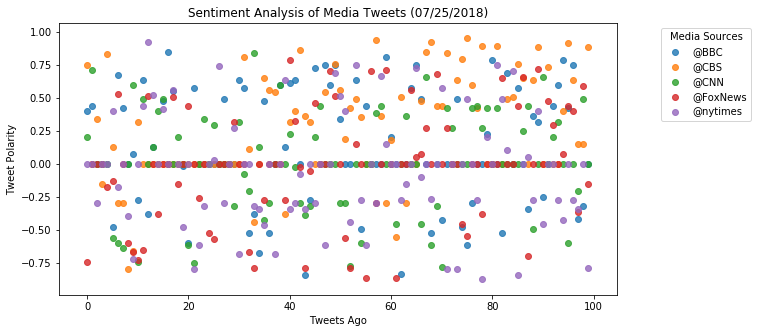

In [6]:
# Scatter plot of Sentiments
x_values = np.arange(100)

fig = plt.figure(figsize=(10, 5))

for user in target_user:
    
    plt.scatter(x_values, user_sentiments[user], marker="o", alpha=0.8)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title = 'Media Sources')

# Add title and labels
plt.title(f'Sentiment Analysis of Media Tweets (%s)' % (time.strftime("%m/%d/%Y")))
plt.ylabel('Tweet Polarity')
plt.xlabel('Tweets Ago')

plt.savefig('VADER Sentiment Analysis.png')
plt.show()

In [7]:
# Overall Sentiments per Organization
User_Group = sentiments_pd.groupby('User')

# Average Compound Scores per Organization
User_Group_Compound = User_Group['Compound'].mean()
User_Group_Compound

User
@BBC        0.124202
@CBS        0.253794
@CNN        0.013676
@FoxNews   -0.011280
@nytimes   -0.047427
Name: Compound, dtype: float64

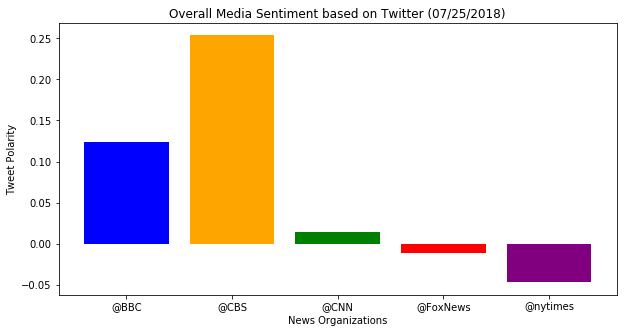

In [8]:
# Bar Plot of overall Sentiments
tweet_ago = np.arange(0,len(User_Group_Compound))

plt.figure(figsize=(10,5))

# Add title and labels
plt.title('Overall Media Sentiment based on Twitter (%s)' % (time.strftime("%m/%d/%Y")))
plt.xlabel('News Organizations')
plt.ylabel('Tweet Polarity')
labels = target_user
plt.xticks(tweet_ago, labels)
colors = ['blue', 'orange', 'green', 'red', 'purple']
plt.bar(tweet_ago, User_Group_Compound, color = colors) 

plt.savefig('Overall Media Sentiment based on Twitter.png')
plt.show()